<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5

## Deep Learning for Computer Vision

In [0]:
import keras
from google.colab import drive, files
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Convolutional networks

Here's a basic MNIST classifier made up `Conv2D` and `MaxPooling2D` layers

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))

W0614 19:31:39.983044 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 19:31:40.007148 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 19:31:40.010866 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 19:31:40.047506 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
# Display the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Connect this convnet to a classifier network - a stack of `Dense` layers
# These process vectors, so we have to flatten the 3D tensor

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
# Now train on MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") /255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") /255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step


W0614 19:31:43.742312 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 19:31:43.770268 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 19:31:43.882131 140068333918080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 19:31:44.002884 140068333918080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.1782 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 53s 879us/step - loss: 0.0473 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 53s 886us/step - loss: 0.0336 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 53s 885us/step - loss: 0.0259 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 53s 876us/step - loss: 0.0213 - acc: 0.9934


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

10000/10000 [==============================] - 3s 301us/step
Test accuracy: 0.9919


### ConvNets on the Cats and Dogs dataset

Here we'll look at a sample of 4,000 photos of cats and dogs, and train on 2,000 of them. Naively training a convnet will result in overfitting, which we'll sort with data augmentation. Then we'll use a pre-trained model to get top accuracy.

In [6]:

drive.mount('/content/drive/')
path = "/content/drive/My Drive/Colab Notebooks/dogs-vs-cats.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# For odd historic reasons, the directory is called train
shutil.move("/tmp/train", "/tmp/dogs_vs_cats")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


'/tmp/dogs_vs_cats'

In [0]:
# Create the test_train directory structure

original_dir = '/tmp/dogs_vs_cats'

base_dir = "/tmp/cats_and_dogs_small"
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# As above, for the validation set
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


# As above, for the test set
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# The first 1000 cats are for training
fnames = [f"cat.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"cat.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"cat.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src,dst)

  
# The first 1000 dogs are for training
fnames = [f"dog.{i}.jpg" for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src,dst)
  
# The next 500 are for validation
fnames = [f"dog.{i}.jpg" for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src,dst)


# The next 500 are for testing
fnames = [f"dog.{i}.jpg" for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src,dst)

In [12]:

  
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [14]:
# Now lets build a convnet with ConvNet2D and MaxPooling layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

W0615 10:43:42.452459 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 10:43:42.510706 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 10:43:42.522788 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 10:43:42.577131 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

W0615 10:45:29.010018 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 10:45:29.020047 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 10:45:29.027405 140708854994816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The steps for getting the data off the drive, where it is stored as JPEGs, are as follows:
- Read the picture files
- Decode the JPEG to RBG pixel grids
- Convert these to floating-point tensors
- Rescale from [0,255] to [0,1]

The `ImageDataGenerator` does all the processing work 

In [18]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 150x150 grids, with binary labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Fit with a generator. The generator will yield data endlessly so you have to tell keras
# when to stop, with the steps_per_epoch flag

history = model.fit_generator(train_generator,
                              steps_per_epoch=100, # 100 batches of 20 samples = 2000 images
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

W0615 10:54:37.662449 140708854994816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 120s 1s/step - loss: 0.6890 - acc: 0.5435 - val_loss: 0.6781 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 119s 1s/step - loss: 0.6469 - acc: 0.6340 - val_loss: 0.7166 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 119s 1s/step - loss: 0.6027 - acc: 0.6755 - val_loss: 0.6092 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.5546 - acc: 0.7175 - val_loss: 0.5882 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.5299 - acc: 0.7395 - val_loss: 0.5964 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 118s 1s/step - loss: 0.5063 - acc: 0.7545 - val_loss: 0.5775 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.4791 - acc: 0.7630 - val_loss: 0.6046 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 119s 1s/step - 

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_1.h5")

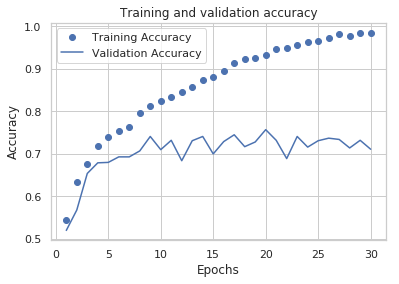

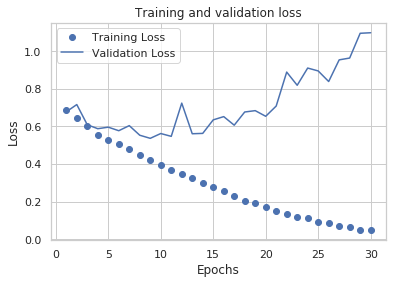

In [23]:
# Plot the loss and accuracy of the model over the training and validation data

# Looks overfit beyond belief to me! We have a History object that can tell us more 

history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


